# Label Propagation for Node Classification

*   Label propagation is a simple and efficient algorithm for node classification in graphs. It works by iteratively assigning labels to nodes based on the labels of their neighbors.

*   The label propagation algorithm works as follows:
Initialize the labels of all nodes to unknown.
For each node, repeat the following steps until convergence:
Calculate the similarity between the node's current label and the labels of its neighbors.
Assign the node the label with the highest similarity.

*   The labels of the nodes are the final predictions of the label propagation algorithm.
The label propagation algorithm is a simple and efficient algorithm that can be used for node classification in graphs. It is not as accurate as some other node classification algorithms, but it is easy to implement and can be used to quickly get a good starting point for node classification.

In [31]:
import random
from typing import Optional, Tuple

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [32]:
def seed_everything(seed: Optional[int] = None) -> None:
    random.seed(seed)
    np.random.seed(seed)


seed_everything(42)

# Why Label Propagation?

> The original is always the best

- Simple things work very well.
- There are many algorithms, but Label Propagation is:
  - Elegant in its concept.
  - Easy to implement.
  - Hard to beat.
  - Related to real-life applications.

# Probabilistic Relational Classifier

This algorithm is similar to Label Propagation but incorporates an additional classifier. Consider the following toy example of a directed graph \( G \):

1. **Set the subset \( L $\subseteq V$ \) of labeled nodes in the graph:**

\begin{equation}
L = \lbrace
(n_1, 0),
(n_2, 0),
(n_6, 1),
(n_7, 1)
\rbrace
\quad
V - L =
\lbrace
(n_3, \texttt{None}),
(n_4, \texttt{None}),
(n_8, \texttt{None}),
(n_9, \texttt{None})
\rbrace
\end{equation}

2. **Initialize the probabilities for every node:**

\begin{equation}
L = \lbrace
(n_1, 0, \text{Prob: } 0.0),
(n_2, 0, \text{Prob: } 0.0),
(n_6, 1, \text{Prob: } 1.0),
(n_7, 1, \text{Prob: } 1.0)
\rbrace
\quad
V - L =
\lbrace
(n_3, \texttt{None}, \text{Prob: } 0.5),
(n_4, \texttt{None}, \text{Prob: } 0.5),
(n_8, \texttt{None}, \text{Prob: } 0.5),
(n_9, \texttt{None}, \text{Prob: } 0.5)
\rbrace
\end{equation}

3. **For every unlabeled node, compute the mean probability of its neighbors:**

\begin{equation}
\mu_i = \frac{1}{|N(v_i)|} \sum_{v_j \in N(v_i)} P(v_j)
\end{equation}

- **Compute the difference between the current probability and the mean:**

\begin{equation}
d(\text{Prob}_i, \mu_i) \leq \tau
\end{equation}

- **If the difference is almost zero, round the mean to get the label:**

\begin{equation}
\text{Label} = \text{Round2Int}(\mu_i)
\end{equation}

- **Otherwise, update the probabilities:**

\[
\begin{bmatrix}
v_1: & 0 & \text{Prob: } 0.0 \\
v_2: & 0 & \text{Prob: } 0.0 \\
v_3: & \texttt{None} & \text{Prob: } 0.1666 \\
v_4: & 0 & \text{Prob: } 0.4166 \\
v_5: & \texttt{None} & \text{Prob: } 0.7291 \\
v_6: & 1 & \text{Prob: } 1.0 \\
v_7: & 1 & \text{Prob: } 1.0 \\
v_8: & \texttt{None} & \text{Prob: } 0.9097 \\
v_9: & \texttt{None} & \text{Prob: } 1.0 \\
\end{bmatrix}
\]

4. **Repeat the procedure until the user-defined number of iterations is reached.**

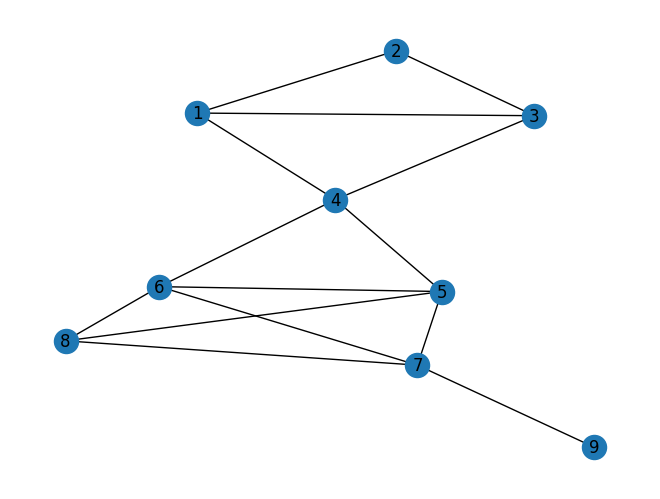

In [33]:
edge_list = [
    (1, 2),
    (1, 3),
    (1, 4),
    (2, 3),
    (3, 4),
    (4, 5),
    (4, 6),
    (5, 6),
    (5, 7),
    (5, 8),
    (6, 7),
    (6, 8),
    (7, 8),
    (7, 9),
]
G = nx.Graph(edge_list)
attrs = {
    1: {"label": 0},
    2: {"label": 0},
    3: {"label": None},
    4: {"label": None},
    5: {"label": None},
    6: {"label": 1},
    7: {"label": 1},
    8: {"label": None},
    9: {"label": None},
}
nx.set_node_attributes(G, attrs)
nx.draw(G, with_labels=True)

In [34]:
for node in G.nodes(data=True):
    node[1]["prob"] = 0.5 if node[1]["label"] is None else 1.0 if node[1]["label"] else 0.0

In [35]:
for node in G.nodes(data=True):
    print(node[1])

{'label': 0, 'prob': 0.0}
{'label': 0, 'prob': 0.0}
{'label': None, 'prob': 0.5}
{'label': None, 'prob': 0.5}
{'label': None, 'prob': 0.5}
{'label': 1, 'prob': 1.0}
{'label': 1, 'prob': 1.0}
{'label': None, 'prob': 0.5}
{'label': None, 'prob': 0.5}


In [36]:
def iteration() -> None:
    for node in G.nodes(data=True):
        if node[1]["label"] is None:
            prob = np.mean([G.nodes[neighbor]["prob"] for neighbor in G.neighbors(node[0])])
            if abs(node[1]["prob"] - prob) < 0.1:
                node[1]["label"] = round(prob)

            node[1]["prob"] = prob

iteration()

In [37]:
for node in G.nodes(data=True):
    print(node[1])

{'label': 0, 'prob': 0.0}
{'label': 0, 'prob': 0.0}
{'label': None, 'prob': 0.16666666666666666}
{'label': 0, 'prob': 0.41666666666666663}
{'label': None, 'prob': 0.7291666666666666}
{'label': 1, 'prob': 1.0}
{'label': 1, 'prob': 1.0}
{'label': None, 'prob': 0.9097222222222222}
{'label': None, 'prob': 1.0}


In [38]:
class ProbabilisticRelationalClassifier:
    def __init__(
        self,
        max_iter: int = 10,
        threshold: float = 0.01,
        node_size: int = 2500,
        node_font_size: int = 10,
        title_font_size: int = 16,
        fig_size: Optional[Tuple[int, int]] = None,
        seed: int = 42,
    ) -> None:
        self.max_iter = max_iter
        self.threshold = threshold
        self.node_size = node_size
        self.node_font_size = node_font_size
        self.title_font_size = title_font_size
        self.fig_size = fig_size
        self.seed = seed

    def _iteration(self) -> None:
        for node in self._G.nodes(data=True):
            if node[1]["label"] is None:
                prob = np.mean([self._G.nodes[neighbor]["prob"] for neighbor in self._G.neighbors(node[0])])
                if abs(node[1]["prob"] - prob) < self.threshold:
                    node[1]["label"] = round(prob)

                node[1]["prob"] = prob

    def _initialization(self):
        for node in self._G.nodes(data=True):
            node[1]["prob"] = 0.5 if node[1]["label"] is None else 1.0 if node[1]["label"] else 0.0

    def _is_converged(self) -> bool:
        return not any(label is None for _, label in nx.get_node_attributes(self._G, "label").items())

    def _draw(self) -> None:
        node_colors = [
            "tab:gray" if node[1]["label"] is None else "tab:blue" if node[1]["label"] else "tab:orange"
            for node in self._G.nodes(data=True)
        ]
        node_lables = {node[0]: f"{node[0]}\nP={node[1]['prob']:.2f}" for node in self._G.nodes(data=True)}
        pos = nx.spring_layout(self._G, seed=self.seed)
        nx.draw(
            self._G,
            pos=pos,
            node_color=node_colors,
            labels=node_lables,
            node_size=self.node_size,
            font_size=self.node_font_size,
            with_labels=True,
        )

    def predict(self, G: nx.Graph, display: bool = True) -> nx.Graph:
        self._G = G.copy()
        num_iter = 0
        self._initialization()
        if display:
            plt.figure(figsize=self.fig_size)
            self._draw()
            plt.title("Initialization", fontsize=self.title_font_size, loc="left")
            plt.show()

        while not self._is_converged() and num_iter < self.max_iter:
            self._iteration()
            num_iter += 1
            if display:
                plt.figure(figsize=self.fig_size)
                self._draw()
                plt.title(f"After iteration {num_iter}", fontsize=self.title_font_size, loc="left")
                plt.show()

        return self._G

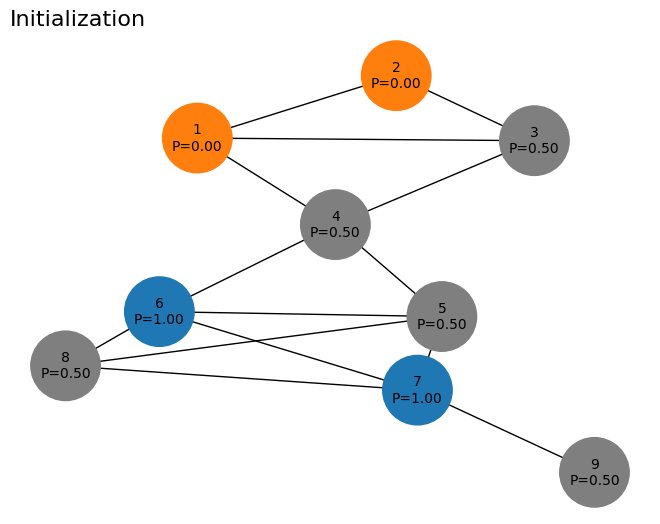

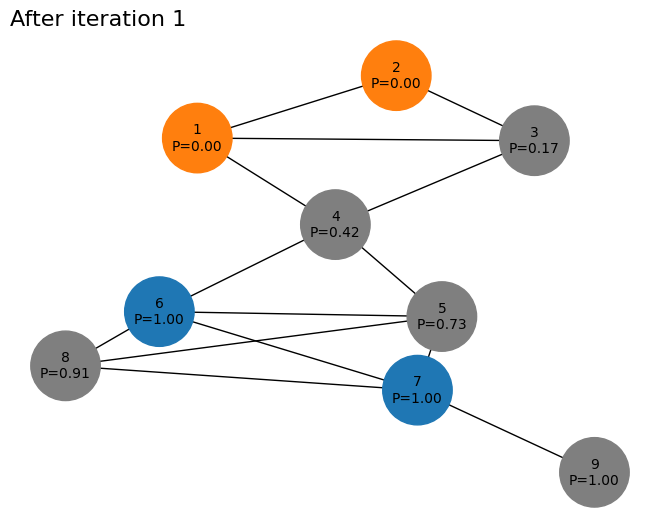

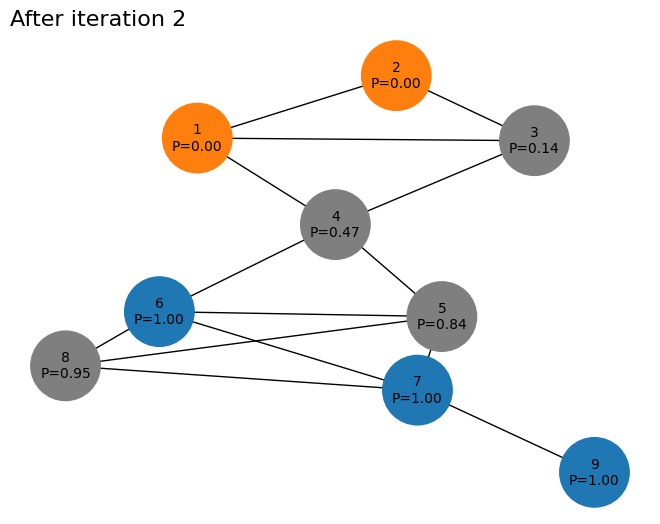

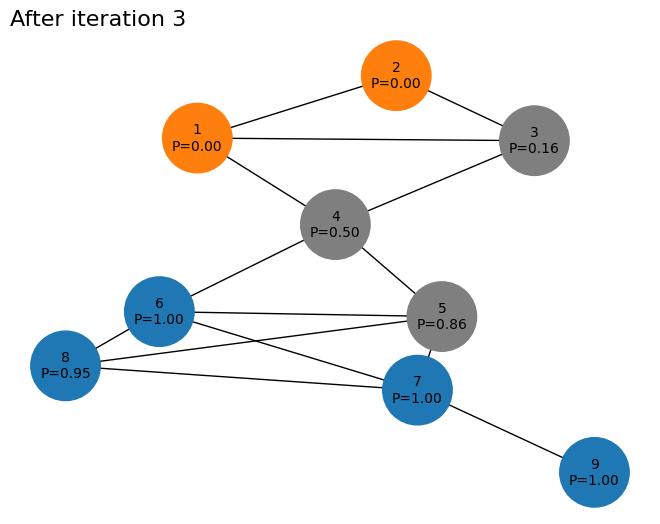

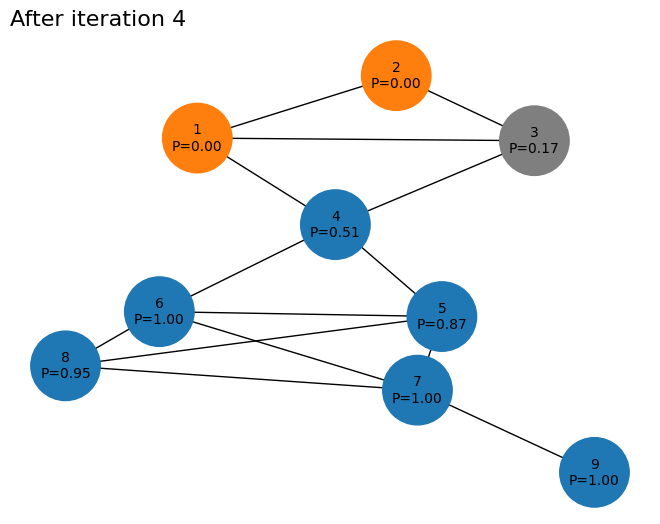

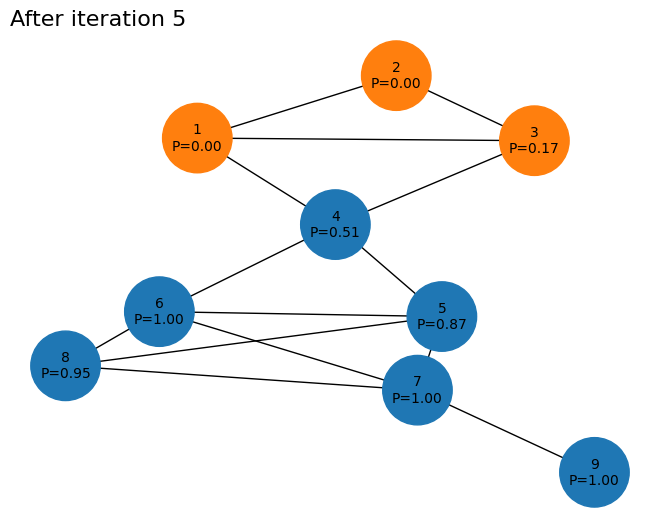

In [39]:
edge_list = [
    (1, 2),
    (1, 3),
    (1, 4),
    (2, 3),
    (3, 4),
    (4, 5),
    (4, 6),
    (5, 6),
    (5, 7),
    (5, 8),
    (6, 7),
    (6, 8),
    (7, 8),
    (7, 9),
]
G = nx.Graph(edge_list)
attrs = {
    1: {"label": 0},
    2: {"label": 0},
    3: {"label": None},
    4: {"label": None},
    5: {"label": None},
    6: {"label": 1},
    7: {"label": 1},
    8: {"label": None},
    9: {"label": None},
}
nx.set_node_attributes(G, attrs)

clf = ProbabilisticRelationalClassifier()
_ = clf.predict(G)

# Iterative Classification



*   As we saw, relational classifiers do not use node attributes, they just use the network structure and the labels
*   We would like a method that incorporates the attributes for node classification
*   Classify the node $v_{i}$ using the features $f_{v_{i}}$ and the labels $z_{v_{i}}$ of its neihborhood $N(v_{i})$
*   Split the task by training two classifiers simultaneously
*   $\phi(f_{v_{i}})$ is passed in the features $f_{v_{i}}$ and outputs the label
*   $\psi(f_{v_{i}}, z_{v_{i}})$ is passsed in the features $f_{v_{i}}$ and the **summary** labels $z_{v_{i}}$
*   The summary labels $z_{v_{i}}$ is the compact representation of all the neighbours in the neighborhood $N(v_{i})$ of node $v_{i}$

> How on earth are we supposed to summarize the labels? Histgrams, most common labels, numbers of different labels, etc...




The algorithm is similar to the first one, however it incorporates another classifier, consider the following toy example of a directed graph $G$


1. Set the subset $L\subseteq V$ of labeled nodes in the graph

    \begin{equation}
        L = \lbrace
        (n_{1}, 1, f_{v}=\left[0, 1\right]),
        (n_{2}, 1, f_{v}=\left[0, 0\right]),
        (n_{4}, 0, f_{v}=\left[1, 1\right])
        \rbrace
        \quad
        V - L =
        \lbrace
        (n_{3}, \text{No Label}, f_{v}=\left[1, 1\right])
        \rbrace
    \end{equation}

2. Initialize the the classification of the node $n_{3}$ by applying the label classifier

    \begin{equation}
        \phi(f_{v}) = \text{Bool2Int}(\texttt{True}\text{ if the first component is 0 else }\texttt{False})
    \end{equation}

    this implies

    \begin{equation}
        L = \lbrace
        (n_{1}, 1, f_{v}=\left[0, 1\right]),
        (n_{2}, 1, f_{v}=\left[0, 0\right]),
        (n_{4}, 0, f_{v}=\left[1, 1\right])
        \rbrace
        \quad
        V - L =
        \lbrace
        (n_{3}, 0, f_{v}=\left[1, 1\right])
        \rbrace
    \end{equation}

    **Spoiler**: This classification is wrong, and we want to rectify this with the other classifier.

3. Bring the other classifier $\psi$ and elaborate the summary labels $z_{v}$ to pass them to it

    \begin{equation}
        L = \lbrace
        (n_{1}, 1, f_{v}=\left[0, 1\right], z_{v} =
        \begin{bmatrix}
        0 & 0 \\
        0 & 1 \\
        \end{bmatrix}),
        (n_{2}, 1, f_{v}=\left[0, 0\right], z_{v} =
        \begin{bmatrix}
        0 & 1 \\
        0 & 0 \\
        \end{bmatrix}),
        (n_{4}, 0, f_{v}=\left[1, 1\right], z_{v} =
        \begin{bmatrix}
        0 & 0 \\
        0 & 0 \\
        \end{bmatrix})
        \rbrace
        \quad
        V - L =
        \lbrace
        (n_{3}, 0, f_{v}=\left[1, 1\right], z_{v} =
        \begin{bmatrix}
        0 & 1 \\
        1 & 1 \\
        \end{bmatrix})
        \rbrace
    \end{equation}

    note that

    \begin{equation}
        \begin{bmatrix}
        \text{Going In of class 0} & \text{Going In of class 1} \\
        \text{Going Out of class 0} & \text{Coming Out of class 1} \\
        \end{bmatrix}
    \end{equation}

    so under the other classifier we have

    \begin{equation}
        \psi(f_{v}, z_{v})
        =
        1 \text{ if the first component is 0 or } \sum_{i} (z_{i,2})_{v} > 1 \text{ else 0}
    \end{equation}

    this updates the previous values

    \begin{equation}
        L = \lbrace
        (n_{1}, 0, f_{v}=\left[0, 1\right], z_{v} =
        \begin{bmatrix}
        0 & 1 \\
        0 & 1 \\
        \end{bmatrix}),
        (n_{2}, 1, f_{v}=\left[0, 0\right], z_{v} =
        \begin{bmatrix}
        0 & 1 \\
        0 & 1 \\
        \end{bmatrix}),
        (n_{4}, 0, f_{v}=\left[1, 1\right], z_{v} =
        \begin{bmatrix}
        0 & 1 \\
        0 & 0 \\
        \end{bmatrix})
        \rbrace
        \quad
        V - L =
        \lbrace
        (n_{3}, 1, f_{v}=\left[1, 1\right], z_{v} =
        \begin{bmatrix}
        0 & 1 \\
        1 & 1 \\
        \end{bmatrix})
        \rbrace
    \end{equation}

4. Compute the user-defined number of iterations for the rest of the nodes.

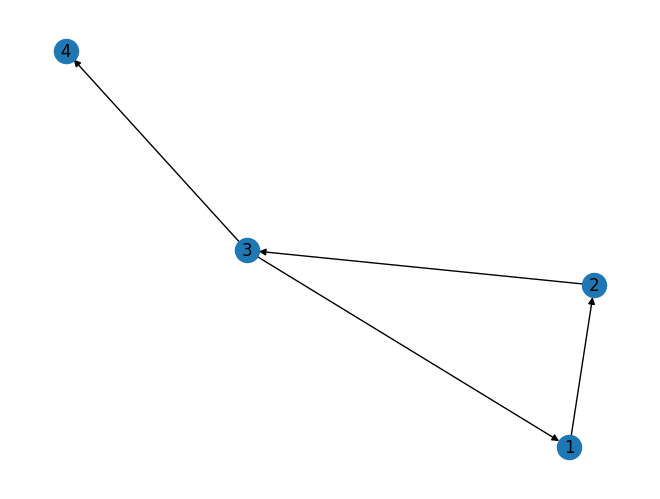

In [40]:
edge_list = [(1, 2), (2, 3), (3, 1), (3, 4)]
G = nx.DiGraph(edge_list)
attrs = {
    1: {"fv": np.array([0, 1]), "Yv":1, "gt": 1},
    2: {"fv": np.array([0, 0]), "Yv": 1, "gt": 1},
    3: {"fv": np.array([1, 0]), "Yv": None, "gt": 1},
    4: {"fv": np.array([1, 1]), "Yv": 0, "gt": 0},
}
nx.set_node_attributes(G, attrs)
# color_map = list()
# for node in G:
#     if attrs[node]["label"] == 0:
#         color_map.append("cyan")
#     if attrs[node]["label"] == 1:
#         color_map.append("yellow")
#     if attrs[node]["label"] == None:
#         color_map.append("gray")
# nx.set_node_attributes(G, attrs)
nx.draw(G, with_labels=True)#, node_color=color_map)

In [41]:
def phi1(fv: np.ndarray) -> int:
    return int(fv[0] == 0)

for node in G.nodes(data=True):
    print(node[1])
    if node[1]["Yv"] is None:
        output = phi1(node[1]["fv"])
        print(output)

{'fv': array([0, 1]), 'Yv': 1, 'gt': 1}
{'fv': array([0, 0]), 'Yv': 1, 'gt': 1}
{'fv': array([1, 0]), 'Yv': None, 'gt': 1}
0
{'fv': array([1, 1]), 'Yv': 0, 'gt': 0}


In [42]:
for node in G.nodes():
    zv = np.zeros((2, 2), dtype=int)
    # print(node, zv)
    for predecessor in G.predecessors(node):
        Yv = G.nodes[predecessor]["Yv"]
        if Yv is not None:
            zv[0, Yv] += 1

    for successor in G.successors(node):
        Yv = G.nodes[successor]["Yv"]
        if Yv is not None:
            zv[1, Yv] += 1
    print(node, zv)
    print(10*"---")
    G.nodes[node]["zv"] = zv


1 [[0 0]
 [0 1]]
------------------------------
2 [[0 1]
 [0 0]]
------------------------------
3 [[0 1]
 [1 1]]
------------------------------
4 [[0 0]
 [0 0]]
------------------------------


In [43]:
def phi2(fv: np.ndarray, zv: np.ndarray) -> int:
    return 1 if fv[0] == 0 or zv[:, 1].sum() > 1 else 0

for node in G.nodes(data=True):
    a = phi2(node[1]["fv"], node[1]["zv"])
    print(a)
    node[1]["Yv"] = a

1
1
1
0


In [44]:
for node in G.nodes(data=True):
    print(node[1])

{'fv': array([0, 1]), 'Yv': 1, 'gt': 1, 'zv': array([[0, 0],
       [0, 1]])}
{'fv': array([0, 0]), 'Yv': 1, 'gt': 1, 'zv': array([[0, 1],
       [0, 0]])}
{'fv': array([1, 0]), 'Yv': 1, 'gt': 1, 'zv': array([[0, 1],
       [1, 1]])}
{'fv': array([1, 1]), 'Yv': 0, 'gt': 0, 'zv': array([[0, 0],
       [0, 0]])}


In [45]:
class IterativeClassifier:
    def __init__(
        self,
        max_iter: int = 10,
        edge_width: float = 2.0,
        node_size: int = 5000,
        node_edge_widths: int = 4,
        node_font_size: int = 8,
        title_font_size: int = 16,
        fig_size: Optional[Tuple[int, int]] = None,
        seed: Optional[int] = 42,
    ) -> None:
        self.max_iter = max_iter
        self.edge_width = edge_width
        self.node_size = node_size
        self.node_edge_widths = node_edge_widths
        self.node_font_size = node_font_size
        self.title_font_size = title_font_size
        self.fig_size = fig_size
        self.seed = seed

    @staticmethod
    def phi1(fv: np.ndarray) -> int:
        return int(fv[0] == 0)

    @staticmethod
    def phi2(fv: np.ndarray, zv: np.ndarray) -> int:
        return 1 if fv[0] == 0 or zv[:, 1].sum() > 1 else 0

    def _apply_classifier_to_unlabeled_set(self) -> None:
        for node in self._G.nodes(data=True):
            node[1]["Yv"] = self.phi1(node[1]["fv"]) if node[1]["Yv"] is None else node[1]["Yv"]

    def _update_relational_features(self) -> None:
        for node in self._G.nodes():
            zv = np.zeros((2, 2), dtype=int)

            for predecessor in self._G.predecessors(node):
                Yv = self._G.nodes[predecessor]["Yv"]
                if Yv is not None:
                    zv[0, Yv] += 1

            for successor in self._G.successors(node):
                Yv = self._G.nodes[successor]["Yv"]
                if Yv is not None:
                    zv[1, Yv] += 1

            self._G.nodes[node]["zv"] = zv

    def _update_labels(self) -> None:
        for node in self._G.nodes(data=True):
            node[1]["Yv"] = self.phi2(node[1]["fv"], node[1]["zv"])

    def _iteration(self) -> bool:
        self._update_relational_features()
        old_Yv = nx.get_node_attributes(self._G, "Yv")
        self._update_labels()
        return old_Yv == nx.get_node_attributes(self._G, "Yv")

    def _draw(self) -> None:
        node_colors = [
            "tab:gray" if node[1]["Yv"] is None else "tab:blue" if node[1]["Yv"] else "tab:orange"
            for node in self._G.nodes(data=True)
        ]
        node_edge_colors = ["tab:blue" if node[1]["gt"] else "tab:orange" for node in self._G.nodes(data=True)]
        label = "Gt: {}, Yv: {}\nfv {}\nI {}\nO {}"
        node_lables = {
            node[0]: label.format(node[1]["gt"], node[1]["Yv"], node[1]["fv"], node[1]["zv"][0], node[1]["zv"][1])
            for node in self._G.nodes(data=True)
        }
        pos = nx.spring_layout(self._G, k=1.0, seed=self.seed)
        nx.draw(
            self._G,
            pos=pos,
            width=self.edge_width,
            node_color=node_colors,
            edgecolors=node_edge_colors,
            linewidths=self.node_edge_widths,
            labels=node_lables,
            node_size=self.node_size,
            font_size=self.node_font_size,
            with_labels=True,
        )

    def predict(self, G: nx.Graph, display: bool = True) -> nx.Graph:
        self._G = G.copy()
        self._update_relational_features()
        self._apply_classifier_to_unlabeled_set()
        num_iter = 0
        if display:
            plt.figure(figsize=self.fig_size)
            self._draw()
            plt.title("Apply classifier to unlabeled set", fontsize=self.title_font_size, loc="left")
            plt.show()

        is_converged = False
        while not is_converged and num_iter < self.max_iter:
            is_converged = self._iteration()
            num_iter += 1
            if display:
                plt.figure(figsize=self.fig_size)
                self._draw()
                plt.title(f"After iteration {num_iter}", fontsize=self.title_font_size, loc="left")
                plt.show()

        return self._G

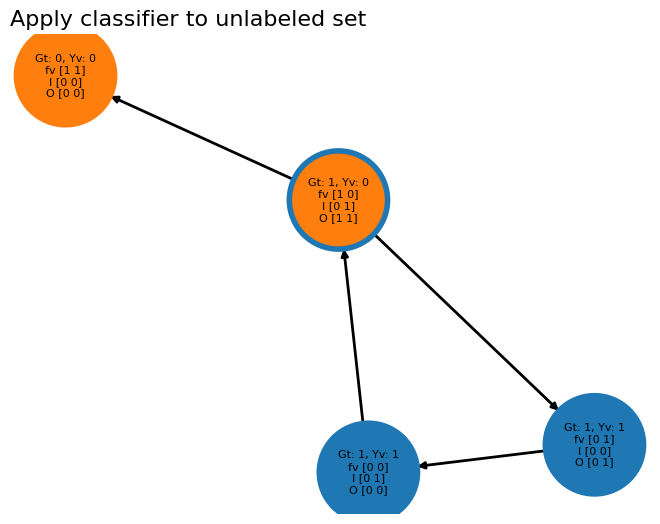

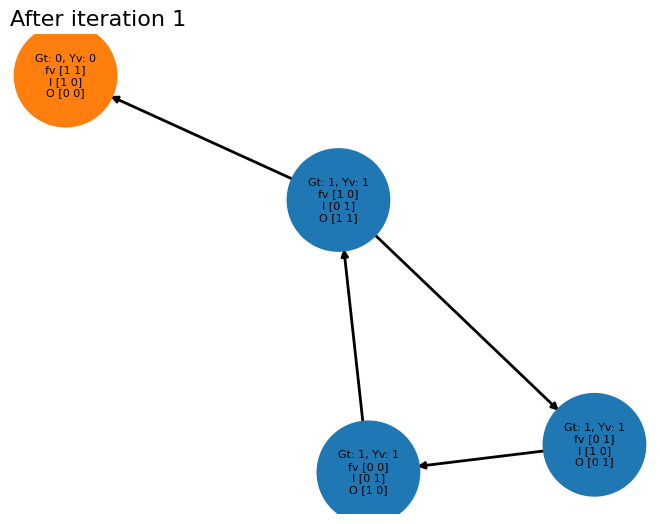

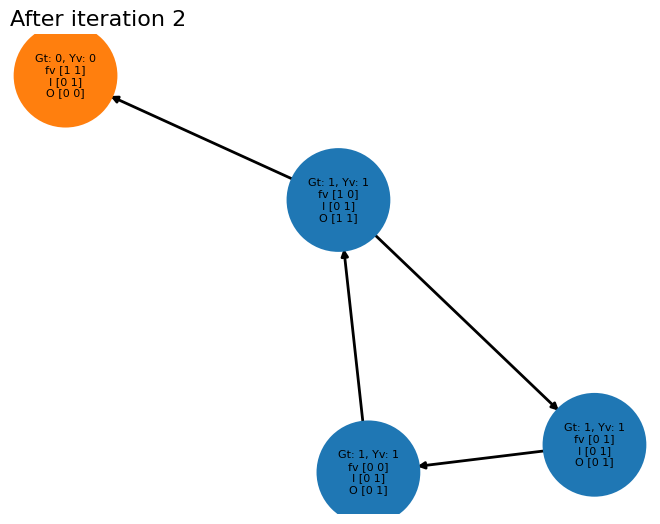

In [46]:
edge_list = [(1, 2), (2, 3), (3, 1), (3, 4)]
G = nx.DiGraph(edge_list)
attrs = {
    1: {"fv": np.array([0, 1]), "Yv": 1, "gt": 1},
    2: {"fv": np.array([0, 0]), "Yv": 1, "gt": 1},
    3: {"fv": np.array([1, 0]), "Yv": None, "gt": 1},
    4: {"fv": np.array([1, 1]), "Yv": 0, "gt": 0},
}
nx.set_node_attributes(G, attrs)

clf = IterativeClassifier()
_ = clf.predict(G)

# Collective Classification: Correct & Smooth

The last and third algorithm incorporates the notion of diffusion to enable a smooth information transition process so the nodes can be readily classified

1. Set the subset $L\subseteq V$ of labeled nodes in the graph

\begin{equation}
\begin{matrix}
    v_{1}: & \text{soft label: } \left[ 0.05 \right. & \left. 0.95 \right] & \text{ground truth: } \left[ 0.0 \right. & \left. 1.0 \right] \\
    v_{2}: & \text{soft label: } \left[ 0.30 \right. & \left. 0.70 \right] & \text{ground truth: } \left[ 0.0 \right. & \left. 1.0 \right] \\
    v_{3}: & \text{soft label: } \left[ 0.60 \right. & \left. 0.40 \right] & \text{ground truth: } & \texttt{None} \\
    v_{4}: & \text{soft label: } \left[ 0.20 \right. & \left. 0.80 \right] & \text{ground truth: } & \texttt{None} \\
    v_{5}: & \text{soft label: } \left[ 0.90 \right. & \left. 0.10 \right] & \text{ground truth: } & \texttt{None} \\
    v_{6}: & \text{soft label: } \left[ 0.60 \right. & \left. 0.40 \right] & \text{ground truth: } \left[ 1.0 \right. & \left. 0.0 \right] \\
    v_{7}: & \text{soft label: } \left[ 0.95 \right. & \left. 0.05 \right] & \text{ground truth: } \left[ 1.0 \right. & \left. 0.0 \right] \\
    v_{8}: & \text{soft label: } \left[ 0.40 \right. & \left. 0.60 \right] & \text{ground truth: } & \texttt{None} \\
    v_{9}: & \text{soft label: } \left[ 0.80 \right. & \left. 0.20 \right] & \text{ground truth: } & \texttt{None} \\
\end{matrix}
\end{equation}

2. Obtain the labels for the nodes and set them in the matrix $Z$

    \begin{equation}
        Z_{\text{labels}}
        =
        \begin{bmatrix}
        v_{1}: & \left[0.0\right. & \left. 1.0 \right] \\
        v_{2}: & \left[0.0\right. & \left. 1.0 \right] \\
        v_{3}: & \left[0.6 \right. & \left. 0.4 \right] \\
        v_{4}: & \left[0.2 \right. & \left. 0.8 \right] \\
        v_{5}: & \left[0.9 \right. & \left. 0.1 \right] \\
        v_{6}: & \left[1.0\right. & \left. 0.0 \right] \\
        v_{7}: & \left[1.0\right. & \left. 0.0 \right] \\
        v_{8}: & \left[0.4\right. & \left. 0.6 \right] \\
        v_{9}: & \left[0.8\right. & \left. 0.2 \right] \\
        \end{bmatrix}
    \end{equation}

3. Compute the erros by substracting the soft label values to the ground truth ones

    \begin{equation}
        \text{Errors} = \text{Ground Truth} - \text{Soft Labels}:
        \quad
        E
        =
        \begin{bmatrix}
        v_{1}: & \left[-0.05\right. & \left. 0.05 \right] \\
        v_{2}: & \left[-0.3\right. & \left. 0.3 \right] \\
        v_{3}: & \left[0.0 \right. & \left. 0.0 \right] \\
        v_{4}: & \left[0.0 \right. & \left. 0.0 \right] \\
        v_{5}: & \left[0.0 \right. & \left. 0.0 \right] \\
        v_{6}: & \left[0.4\right. & \left. -0.4 \right] \\
        v_{7}: & \left[0.05\right. & \left. -0.05 \right] \\
        v_{8}: & \left[0.0\right. & \left. 0.0 \right] \\
        v_{9}: & \left[0.0\right. & \left. 0.0 \right] \\
        \end{bmatrix}
    \end{equation}

4. Compute the diffusion matrix and apply the diffuse operator to the labels

    \begin{equation}
        \tilde{A} =
        \begin{pmatrix}
        0.25 & 0.28868 & 0.25 & 0.22361 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
        0.28868 & 0.33333 & 0.28868 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
        0.25 & 0.28868 & 0.25 & 0.22361 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
        0.22361 & 0.0 & 0.22361 & 0.2 & 0.22361 & 0.22361 & 0.0 & 0.0 & 0.0 \\
        0.0 & 0.0 & 0.0 & 0.22361 & 0.25 & 0.25 & 0.25 & 0.0 & 0.0 \\
        0.0 & 0.0 & 0.0 & 0.22361 & 0.25 & 0.25 & 0.0 & 0.28868 & 0.0 \\
        0.0 & 0.0 & 0.0 & 0.0 & 0.25 & 0.0 & 0.25 & 0.28868 & 0.35355 \\
        0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.28868 & 0.28868 & 0.33333 & 0.0 \\
        0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.35355 & 0.0 & 0.5 \\
        \end{pmatrix}
    \end{equation}

    and apply the diffuse

    \begin{equation}
        \text{Diffuse}(X, \alpha)
        =
        (1 - \alpha) X + \alpha \tilde{A}
    \end{equation}

5. For the number of correction-iterations and the given correction $\alpha$ and smooth parameter $\sigma$ values apply the diffuse to $Z$

\begin{equation}
    \text{Correction}: \quad
    E_{k+1} = \text{Diffuse}(E_{k}, \alpha_{\text{correction}})
    \quad
    \sigma E + \text{attributes}(v) \mapsto \text{attributes}(v)
\end{equation}

6. For the number of smoothing-iterations and the given $\alpha$ value apply the diffuse to $Z$

\begin{equation}
    \text{Smoothing}: \quad
    Z_{k+1} = \text{Diffuse}(Z_{k}, \alpha)
    \quad
    Z_{k+1} \mapsto \text{attributes}(v_{i})
\end{equation}


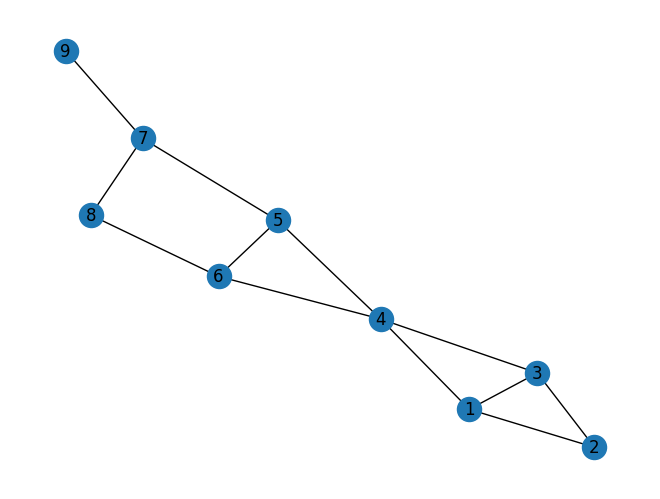

In [47]:
edge_list = [
    (1, 2),
    (1, 3),
    (1, 4),
    (2, 3),
    (3, 4),
    (4, 5),
    (4, 6),
    (5, 6),
    (5, 7),
    (6, 8),
    (7, 8),
    (7, 9),
]
G = nx.Graph(edge_list)
attrs = {
    1: {"soft_label": np.array([0.05, 0.95]), "ground_truth": np.array([0.0, 1.0])},
    2: {"soft_label": np.array([0.30, 0.70]), "ground_truth": np.array([0.0, 1.0])},
    3: {"soft_label": np.array([0.60, 0.40]), "ground_truth": None},
    4: {"soft_label": np.array([0.20, 0.80]), "ground_truth": None},
    5: {"soft_label": np.array([0.90, 0.10]), "ground_truth": None},
    6: {"soft_label": np.array([0.60, 0.40]), "ground_truth": np.array([1.0, 0.0])},
    7: {"soft_label": np.array([0.95, 0.05]), "ground_truth": np.array([1.0, 0.0])},
    8: {"soft_label": np.array([0.40, 0.60]), "ground_truth": None},
    9: {"soft_label": np.array([0.80, 0.20]), "ground_truth": None},
}
nx.set_node_attributes(G, attrs)
nx.draw(G, with_labels=True)

In [48]:
def get_normalized_diffusion_matrix(G: nx.Graph) -> np.ndarray:
    A = np.asarray(nx.adjacency_matrix(G).todense())
    degrees = np.array([degree for _, degree in G.degree()])
    # Add self-loops
    A[range(len(A)), range(len(A))] = 1.0
    degrees += 1
    # Compute D^-1/2
    Dm12 = np.diag(1 / np.sqrt(degrees))
    return Dm12.dot(A).dot(Dm12)

ndm = get_normalized_diffusion_matrix(G)

print(ndm)

[[0.25       0.28867513 0.25       0.2236068  0.         0.
  0.         0.         0.        ]
 [0.28867513 0.33333333 0.28867513 0.         0.         0.
  0.         0.         0.        ]
 [0.25       0.28867513 0.25       0.2236068  0.         0.
  0.         0.         0.        ]
 [0.2236068  0.         0.2236068  0.2        0.2236068  0.2236068
  0.         0.         0.        ]
 [0.         0.         0.         0.2236068  0.25       0.25
  0.25       0.         0.        ]
 [0.         0.         0.         0.2236068  0.25       0.25
  0.         0.28867513 0.        ]
 [0.         0.         0.         0.         0.25       0.
  0.25       0.28867513 0.35355339]
 [0.         0.         0.         0.         0.         0.28867513
  0.28867513 0.33333333 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.35355339 0.         0.5       ]]


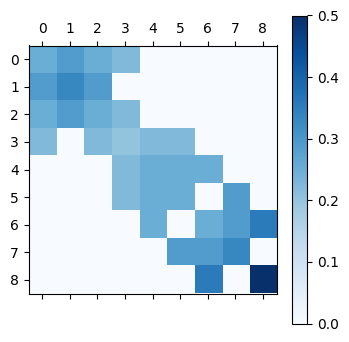

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
ax.set_axis_off()
ax = fig.add_subplot(1, 1, 1)
pos = ax.matshow(ndm, cmap=plt.cm.Blues)
fig.colorbar(pos, ax=ax)
plt.show()

\begin{equation}
    Z_{\text{labels}}
    =
    \begin{bmatrix}
    v_{1}: & \left[0\right. & \left. 1 \right] \\
    v_{2}: & \left[0\right. & \left. 1 \right] \\
    v_{3}: & \left[0.6 \right. & \left. 0.4 \right] \\
    v_{4}: & \left[0.2 \right. & \left. 0.8 \right] \\
    v_{5}: & \left[0.9 \right. & \left. 0.1 \right] \\
    v_{6}: & \left[1\right. & \left. 0 \right] \\
    v_{7}: & \left[1\right. & \left. 0 \right] \\
    v_{8}: & \left[0.4\right. & \left. 0.6 \right] \\
    v_{9}: & \left[0.8\right. & \left. 0.2 \right] \\
    \end{bmatrix}
\end{equation}

In [50]:
for node in G.nodes(data=True):
    print(node)

(1, {'soft_label': array([0.05, 0.95]), 'ground_truth': array([0., 1.])})
(2, {'soft_label': array([0.3, 0.7]), 'ground_truth': array([0., 1.])})
(3, {'soft_label': array([0.6, 0.4]), 'ground_truth': None})
(4, {'soft_label': array([0.2, 0.8]), 'ground_truth': None})
(5, {'soft_label': array([0.9, 0.1]), 'ground_truth': None})
(6, {'soft_label': array([0.6, 0.4]), 'ground_truth': array([1., 0.])})
(7, {'soft_label': array([0.95, 0.05]), 'ground_truth': array([1., 0.])})
(8, {'soft_label': array([0.4, 0.6]), 'ground_truth': None})
(9, {'soft_label': array([0.8, 0.2]), 'ground_truth': None})


In [51]:
def get_labels() -> np.ndarray:
    Z = np.zeros((G.number_of_nodes(), 2))
    for idx, (_, attrs) in enumerate(G.nodes(data=True)):
        gt = attrs["ground_truth"]
        if gt is None:
            Z[idx] = attrs["soft_label"]
        else:
            Z[idx] = gt

    return Z

Z = get_labels()
Z

array([[0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2]])

\begin{equation}
    \text{Errors} = \text{Ground Truth} - \text{Soft Labels}:
    \quad
    E
    =
    \begin{bmatrix}
    v_{1}: & \left[-0.05\right. & \left. 0.05 \right] \\
    v_{2}: & \left[-0.3\right. & \left. 0.3 \right] \\
    v_{3}: & \left[0.0 \right. & \left. 0.0 \right] \\
    v_{4}: & \left[0.0 \right. & \left. 0.0 \right] \\
    v_{5}: & \left[0.0 \right. & \left. 0.0 \right] \\
    v_{6}: & \left[0.4\right. & \left. -0.4 \right] \\
    v_{7}: & \left[0.05\right. & \left. -0.05 \right] \\
    v_{8}: & \left[0.0\right. & \left. 0.0 \right] \\
    v_{9}: & \left[0.0\right. & \left. 0.0 \right] \\
    \end{bmatrix}
\end{equation}

In [52]:
def compute_train_errs() -> np.ndarray:
    E = np.zeros((G.number_of_nodes(), 2))
    for idx, (_, attrs) in enumerate(G.nodes(data=True)):
        gt = attrs["ground_truth"]
        if gt is not None:
            E[idx] = gt - attrs["soft_label"]

    return E
E = compute_train_errs()
E

array([[-0.05,  0.05],
       [-0.3 ,  0.3 ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.4 , -0.4 ],
       [ 0.05, -0.05],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ]])

\begin{equation}
    \text{Diffuse}(X, \alpha)
    =
    (1 - \alpha) X + \alpha \tilde{A} X
\end{equation}

In [53]:
def diffuse(X, alpha) -> np.ndarray:
    return (1 - alpha) * X + alpha * A_tilde.dot(X)

In [54]:
for node in G.nodes(data=True):
    print(node)

(1, {'soft_label': array([0.05, 0.95]), 'ground_truth': array([0., 1.])})
(2, {'soft_label': array([0.3, 0.7]), 'ground_truth': array([0., 1.])})
(3, {'soft_label': array([0.6, 0.4]), 'ground_truth': None})
(4, {'soft_label': array([0.2, 0.8]), 'ground_truth': None})
(5, {'soft_label': array([0.9, 0.1]), 'ground_truth': None})
(6, {'soft_label': array([0.6, 0.4]), 'ground_truth': array([1., 0.])})
(7, {'soft_label': array([0.95, 0.05]), 'ground_truth': array([1., 0.])})
(8, {'soft_label': array([0.4, 0.6]), 'ground_truth': None})
(9, {'soft_label': array([0.8, 0.2]), 'ground_truth': None})


For the number of correction-iterations and the given correction $\alpha$ and smooth parameter $\sigma$ values apply the diffuse to $Z$

\begin{equation}
    \text{Correction}: \quad
    E_{k+1} = \text{Diffuse}(E_{k}, \alpha_{\text{correction}})
    \quad
    \sigma E + \text{attributes}(v) \mapsto \text{attributes}(v)
\end{equation}

In [55]:
num_correct_iters = 3
correct_alpha = 0.8
smooth_s = 2.0
A_tilde = get_normalized_diffusion_matrix(G)

def correct_step() -> None:
    E = compute_train_errs()
    for _ in range(num_correct_iters):
        E = diffuse(E, correct_alpha)

    for idx, (_, attrs) in enumerate(G.nodes(data=True)):
        attrs["soft_label"] += smooth_s * E[idx]

correct_step()

For the number of smoothing-iterations and the given $\alpha$ value apply the diffuse to $Z$

\begin{equation}
    \text{Smoothing}: \quad
    Z_{k+1} = \text{Diffuse}(Z_{k}, \alpha)
    \quad
    Z_{k+1} \mapsto \text{attributes}(v_{i})
\end{equation}

In [56]:
smooth_alpha = 0.8
num_smooth_iters = 3
A_tilde = get_normalized_diffusion_matrix(G)

def smooth_step() -> None:
    Z = get_labels()
    for _ in range(num_smooth_iters):
        Z = diffuse(Z, smooth_alpha)

    for idx, (_, attrs) in enumerate(G.nodes(data=True)):
        attrs["soft_label"] = Z[idx]

smooth_step()

In [57]:
for node in G.nodes(data=True):
    print(node)

(1, {'soft_label': array([0.26909679, 0.74386016]), 'ground_truth': array([0., 1.])})
(2, {'soft_label': array([0.17170726, 0.7159328 ]), 'ground_truth': array([0., 1.])})
(3, {'soft_label': array([0.2728871 , 0.74006984]), 'ground_truth': None})
(4, {'soft_label': array([0.55966183, 0.56068162]), 'ground_truth': None})
(5, {'soft_label': array([0.75819336, 0.26520349]), 'ground_truth': None})
(6, {'soft_label': array([0.73031108, 0.2849034 ]), 'ground_truth': array([1., 0.])})
(7, {'soft_label': array([0.925891  , 0.17027427]), 'ground_truth': array([1., 0.])})
(8, {'soft_label': array([0.74169378, 0.17712946]), 'ground_truth': None})
(9, {'soft_label': array([0.72138459, 0.09811811]), 'ground_truth': None})


In [58]:
def get_labels() -> np.ndarray:
    Z = np.zeros((G.number_of_nodes(), 2))
    for idx, (_, attrs) in enumerate(G.nodes(data=True)):
        gt = attrs["ground_truth"]
        if gt is None:
            Z[idx] = attrs["soft_label"]
        else:
            Z[idx] = gt

    return Z

Z = get_labels()
Z

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.2728871 , 0.74006984],
       [0.55966183, 0.56068162],
       [0.75819336, 0.26520349],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.74169378, 0.17712946],
       [0.72138459, 0.09811811]])

In [59]:
def get_normalized_diffusion_matrix(G: nx.Graph) -> np.ndarray:
    A = np.asarray(nx.adjacency_matrix(G).todense())
    degrees = np.array([degree for _, degree in G.degree()])
    # Add self-loops
    A[range(len(A)), range(len(A))] = 1.0
    degrees += 1
    # Compute D^-1/2
    Dm12 = np.diag(1 / np.sqrt(degrees))
    return Dm12.dot(A).dot(Dm12)


class CorrectAndSmooth:
    def __init__(
        self,
        correct_alpha: float = 0.8,
        smooth_alpha: float = 0.8,
        smooth_s: float = 2.0,
        num_correct_iters: int = 3,
        num_smooth_iters: int = 3,
        edge_width: float = 2.0,
        node_size: int = 2500,
        node_edge_widths: int = 4,
        node_font_size: int = 12,
        title_font_size: int = 16,
        fig_size: Optional[Tuple[int, int]] = None,
        seed: Optional[int] = 42,
    ) -> None:
        self.correct_alpha = correct_alpha
        self.smooth_alpha = smooth_alpha
        self.smooth_s = smooth_s
        self.num_correct_iters = num_correct_iters
        self.num_smooth_iters = num_smooth_iters
        self.edge_width = edge_width
        self.node_size = node_size
        self.node_edge_widths = node_edge_widths
        self.node_font_size = node_font_size
        self.title_font_size = title_font_size
        self.fig_size = fig_size
        self.seed = seed

    def _correct_step(self) -> None:
        E = self._compute_train_errs()
        for _ in range(self.num_correct_iters):
            E = self._diffuse(E, self.correct_alpha)

        for idx, (_, attrs) in enumerate(self._G.nodes(data=True)):
            attrs["soft_label"] += self.smooth_s * E[idx]

    def _smooth_step(self) -> None:
        Z = self._get_labels()
        for _ in range(self.num_smooth_iters):
            Z = self._diffuse(Z, self.smooth_alpha)

        for idx, (_, attrs) in enumerate(self._G.nodes(data=True)):
            attrs["soft_label"] = Z[idx]

    def _compute_train_errs(self) -> np.ndarray:
        E = np.zeros((self._G.number_of_nodes(), 2))
        for idx, (_, attrs) in enumerate(self._G.nodes(data=True)):
            gt = attrs["ground_truth"]
            if gt is not None:
                E[idx] = gt - attrs["soft_label"]

        return E

    def _get_labels(self) -> np.ndarray:
        Z = np.zeros((self._G.number_of_nodes(), 2))
        for idx, (_, attrs) in enumerate(self._G.nodes(data=True)):
            gt = attrs["ground_truth"]
            if gt is None:
                Z[idx] = attrs["soft_label"]
            else:
                Z[idx] = gt

        return Z

    def _diffuse(self, X, alpha) -> np.ndarray:
        return (1 - alpha) * X + alpha * self._A_tilde.dot(X)

    def _draw(self) -> None:
        node_colors = [
            "tab:orange" if np.argmax(node[1]["soft_label"]) else "tab:blue" for node in self._G.nodes(data=True)
        ]
        node_lables = {
            node[0]: f"[{node[0]}]\n{node[1]['soft_label'][0]:.2f}\n{node[1]['soft_label'][1]:.2f}"
            for node in self._G.nodes(data=True)
        }
        pos = nx.spring_layout(self._G, seed=self.seed)
        nx.draw(
            self._G,
            pos=pos,
            width=self.edge_width,
            node_color=node_colors,
            linewidths=self.node_edge_widths,
            labels=node_lables,
            node_size=self.node_size,
            font_size=self.node_font_size,
            with_labels=True,
        )

    def predict(self, G: nx.Graph, display: bool = True) -> nx.Graph:
        self._G = G.copy()
        if display:
            plt.figure(figsize=self.fig_size)
            self._draw()
            plt.title("Initial soft labels", fontsize=self.title_font_size, loc="left")
            plt.show()

        self._A_tilde = get_normalized_diffusion_matrix(self._G)
        self._correct_step()
        if display:
            plt.figure(figsize=self.fig_size)
            self._draw()
            plt.title("After correct step", fontsize=self.title_font_size, loc="left")
            plt.show()

        self._smooth_step()
        if display:
            plt.figure(figsize=self.fig_size)
            self._draw()
            plt.title("After smooth step", fontsize=self.title_font_size, loc="left")
            plt.show()

        return self._G

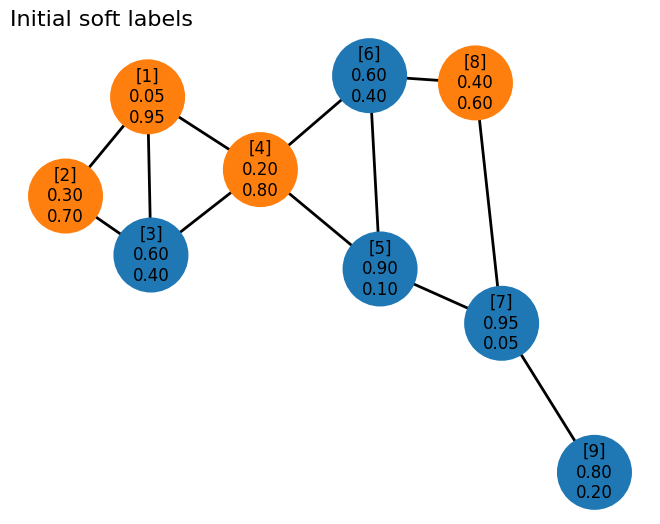

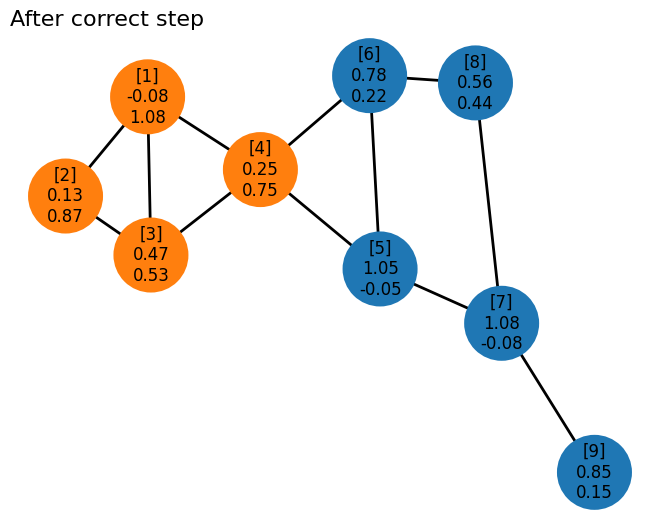

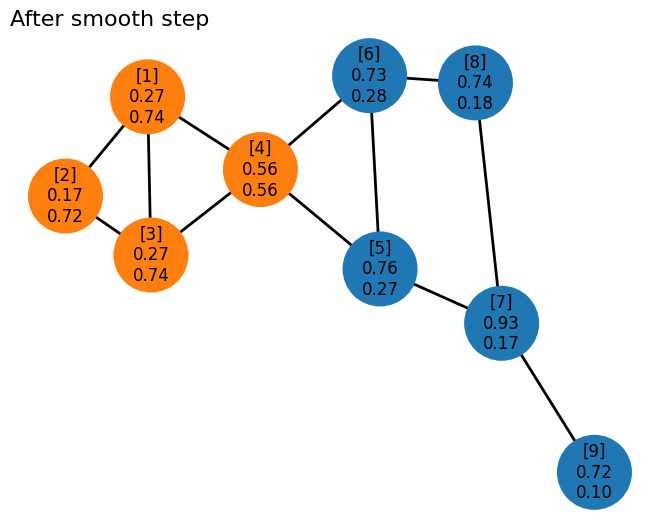

In [60]:
edge_list = [
    (1, 2),
    (1, 3),
    (1, 4),
    (2, 3),
    (3, 4),
    (4, 5),
    (4, 6),
    (5, 6),
    (5, 7),
    (6, 8),
    (7, 8),
    (7, 9),
]
G = nx.Graph(edge_list)
attrs = {
    1: {"soft_label": np.array([0.05, 0.95]), "ground_truth": np.array([0.0, 1.0])},
    2: {"soft_label": np.array([0.30, 0.70]), "ground_truth": np.array([0.0, 1.0])},
    3: {"soft_label": np.array([0.60, 0.40]), "ground_truth": None},
    4: {"soft_label": np.array([0.20, 0.80]), "ground_truth": None},
    5: {"soft_label": np.array([0.90, 0.10]), "ground_truth": None},
    6: {"soft_label": np.array([0.60, 0.40]), "ground_truth": np.array([1.0, 0.0])},
    7: {"soft_label": np.array([0.95, 0.05]), "ground_truth": np.array([1.0, 0.0])},
    8: {"soft_label": np.array([0.40, 0.60]), "ground_truth": None},
    9: {"soft_label": np.array([0.80, 0.20]), "ground_truth": None},
}
nx.set_node_attributes(G, attrs)

clf = CorrectAndSmooth()
_ = clf.predict(G)